In [68]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import glob, os

%matplotlib inline

In [69]:
def load_audio_file(file_path, fs, duration):
    duration_in_samples = fs * duration
    _, data = wavfile.read(file_path) #, sr=16000
    if len(data) > duration_in_samples:
        data = data[:duration_in_samples]
    else:
        data = np.pad(data, (0, max(0, duration_in_samples - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()
def load_wav_by_path(p, fs):
    _, wav = wavfile.read(p)
    if wav.size < fs:
        wav = np.pad(wav, (fs - wav.size, 0), mode='constant')
    else:
        wav = wav[0:fs]
    # wav = signal.resample(wav, 8000)
    mean = np.mean(np.ravel(wav))
    std = np.std(np.ravel(wav))
    if std != 0:
        wav = wav - mean
        wav = wav / std
    return wav

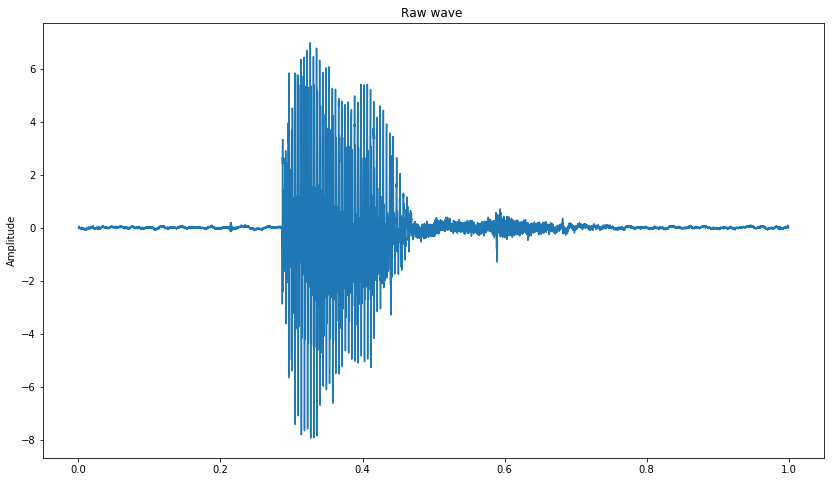

In [70]:
fs = 16000
wav = load_wav_by_path("../input/train/audio/off/1df483c0_nohash_0.wav", fs)
plot_time_series(wav)
ipd.Audio(wav, rate=fs)

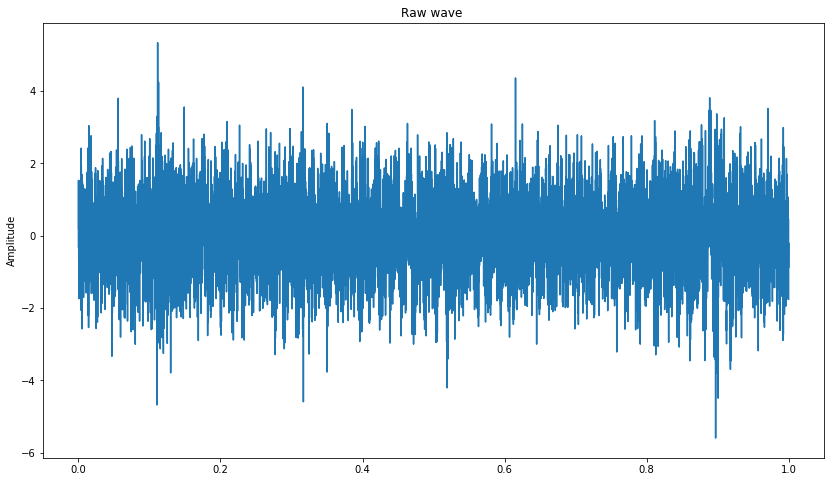

In [71]:
silences_path = glob.glob(os.path.join('..', 'input', 'train', 'audio', 'silence', '*wav'))
silences_path = np.random.choice(silences_path, 5)
silence = load_wav_by_path(silences_path[0], fs)
plot_time_series(silence)
ipd.Audio(silence, rate=fs)

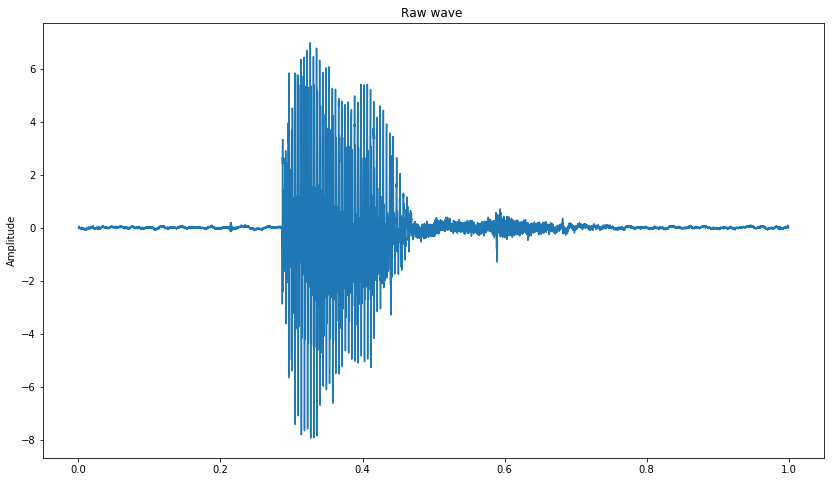

In [72]:
scale = np.random.uniform(low=0, high=0.2, size=1)
data_noised = (1 - scale) * wav + (silence * scale)
plot_time_series(wav)
ipd.Audio(wav, rate=fs)

0.9835630737702523


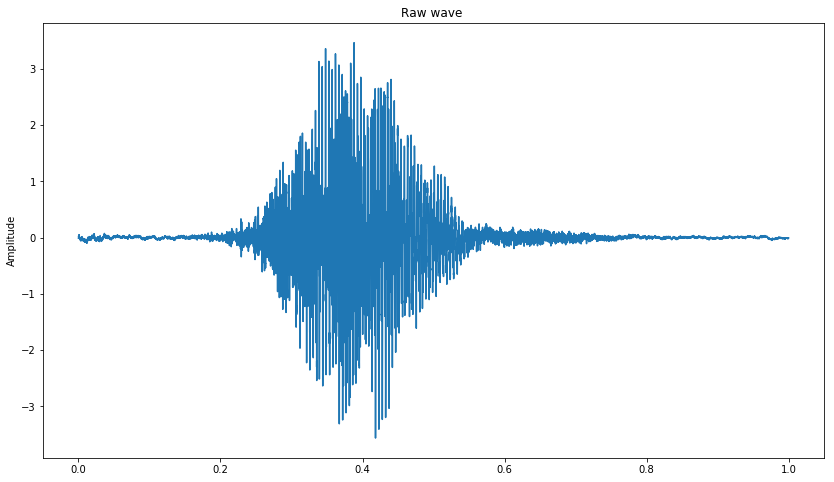

In [75]:
speed_change = np.random.uniform(low=0.9,high=1.1)
print(speed_change)
tmp = librosa.effects.time_stretch(wav, speed_change)
minlen = min( wav.shape[0], tmp.shape[0])        # keep same length as original;
wav_speed = wav
wav_speed *= 0                                    # pad with zeros
wav_speed[0:minlen] = tmp[0:minlen]
plot_time_series(wav_speed)
ipd.Audio(wav_speed, rate=fs)

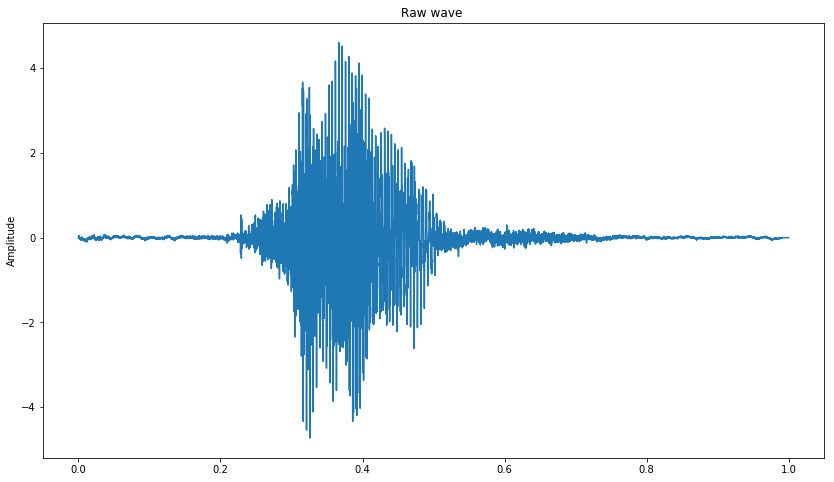

In [74]:
bins_per_octave = 24        # pitch increments are quarter-steps
pitch_pm = 4                                # +/- this many quarter steps
pitch_change =  pitch_pm * 2*(np.random.uniform()-0.5)
wav = librosa.effects.pitch_shift(wav, fs, n_steps=pitch_change, bins_per_octave=bins_per_octave)
plot_time_series(wav)
ipd.Audio(wav, rate=fs)